# Получение и предобработка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/project')

Mounted at /content/drive/


In [ ]:
import yfinance as yf
import pandas as pd
from tqdm import tqdm
import numpy as np
import lightgbm as lgb
import pickle
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
pd.options.plotting.backend = "plotly"
import os
import time
os.environ["PYTHONWARNINGS"] = "ignore"

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.where(y_true == 0, 1, y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [ ]:

def download_dg_data(start_date='2012-01-01', end_date='2024-01-01'):
    tickers = ['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
           'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD',
           'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']

    index = yf.download("AAPL",start_date, end_date, progress = False)["Adj Close"].index
    full_data = pd.DataFrame(index=index)

    for i in tqdm(range(len(tickers))):
        try:
            ticker_data = yf.download(tickers[i], start_date, end_date, progress=False)["Adj Close"].rename(tickers[i])
            full_data = full_data.join(ticker_data, how='outer')

        except Exception as e:
            pass

    return full_data

In [ ]:
data = download_dg_data()
data.to_csv('data2.csv', index=True)

100%|██████████| 30/30 [00:07<00:00,  3.78it/s]


In [ ]:
data = pd.read_csv('data2.csv')

In [ ]:
data = data.dropna(axis=1)

In [ ]:
from ipywidgets import IntProgress
from IPython.display import display
import pandas as pd

def generate_lagged_features(data, target_cols, lags, windows, metrics):

    result_data = data.copy()

    total_iterations = len(target_cols) * len(windows) * len(lags)
    progress = IntProgress(min=0, max=total_iterations, description="Processing")
    display(progress)

    new_columns = {}

    for target_col in target_cols:
        for window in windows:
            for lag in lags:
                for metric in metrics:

                    column_name = f"{target_col}_window{window}_lag{lag}_{metric}"

                    if metric == "mean":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).mean()
                    elif metric == "var":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).var()
                    elif metric == "median":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.5)
                    elif metric == "q1":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.25)
                    elif metric == "q3":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.75)
                    elif metric == "percentile_90":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.9)
                    elif metric == "percentile_80":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.8)
                    elif metric == "percentile_20":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.2)
                    elif metric == "percentile_10":
                        new_columns[column_name] = data[target_col].shift(lag).rolling(window).quantile(0.1)

                progress.value += 1

    # Convert the dictionary of new columns to a DataFrame
    new_columns_df = pd.DataFrame(new_columns)

    # Concatenate the new DataFrame with the original DataFrame
    result_data = pd.concat([result_data, new_columns_df], axis=1)

    progress.close()

    return result_data

In [ ]:
tickers = data.columns[1:]

full_data = data["Date"].copy()
full_data = pd.DataFrame(full_data)



for ticker in tickers:

    proxy = data["Date"].copy()
    proxy = pd.DataFrame(proxy)
    proxy["ticker"] = data[ticker].values

    proxy_result_data = generate_lagged_features(proxy, target_cols=["ticker"],
                                                lags=[30,45,60,75,90,180,365],
                                                windows=[1,2,3,4,5,10,20,30,60,90,180,365],
                                               metrics=['mean', 'var', "percentile_90", "percentile_10"])
    if ticker == "AAPL":
        full_data = proxy_result_data.copy()

    else:
        full_data = pd.concat([full_data, proxy_result_data])

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

IntProgress(value=0, description='Processing', max=84)

In [ ]:
full_data

,Date,ticker,ticker_window1_lag30_mean,ticker_window1_lag30_var,ticker_window1_lag30_percentile_90,ticker_window1_lag30_percentile_10,ticker_window1_lag45_mean,ticker_window1_lag45_var,ticker_window1_lag45_percentile_90,ticker_window1_lag45_percentile_10,...,ticker_window365_lag90_percentile_90,ticker_window365_lag90_percentile_10,ticker_window365_lag180_mean,ticker_window365_lag180_var,ticker_window365_lag180_percentile_90,ticker_window365_lag180_percentile_10,ticker_window365_lag365_mean,ticker_window365_lag365_var,ticker_window365_lag365_percentile_90,ticker_window365_lag365_percentile_10
0,2012-01-03,12.433825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-04,12.500651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-05,12.639427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-06,12.771559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-09,12.751300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,2023-12-22,52.039433,54.253036,NaN,54.253036,54.253036,53.210476,NaN,53.210476,53.210476,...,51.044503,40.97094,45.393346,8.180306,48.857848,40.97094,45.061483,6.969985,48.154827,40.77891
3014,2023-12-26,51.959702,55.004345,NaN,55.004345,55.004345,52.545219,NaN,52.545219,52.545219,...,51.075506,40.97094,45.396916,8.204672,48.927967,40.97094,45.054149,7.002828,48.154827,40.77891
3015,2023-12-27,52.448040,55.497498,NaN,55.497498,55.497498,53.289906,NaN,53.289906,53.289906,...,51.111123,40.97094,45.401241,8.231712,48.979530,40.97094,45.046624,7.029767,48.154827,40.77891
3016,2023-12-28,52.345058,55.487564,NaN,55.487564,55.487564,54.031288,NaN,54.031288,54.031288,...,51.134206,40.97094,45.405981,8.258305,49.033329,40.97094,45.038458,7.058550,48.154827,40.77891


In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Определите индексы столбцов для преобразования (все, кроме первого)
columns_to_transform = full_data.columns[1:]

# Примените трансформацию Бокса-Кокса к каждому из выбранных столбцов
transformed_data = full_data.copy()

_, lambda_val = boxcox(full_data[full_data.columns[1]].values)

transformed_data = full_data.copy()
for col in columns_to_transform:
    transformed_data[col] = boxcox(full_data[col], lmbda=lambda_val)

In [ ]:
full_data = transformed_data.copy()

In [ ]:
with open('lambda_val.pkl', 'wb') as f:
    pickle.dump(lambda_val, f)

In [ ]:
horizon = 30
#Если ставим больше 30, то нужно менять сгенерированные значения, lag должен быть >= horizon

In [ ]:
#Добавляем дни недели
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data.loc[:, 'day_of_week'] = full_data['Date'].dt.day_name()


#Откладываем даты
all_dates = full_data["Date"].copy()
all_dates = pd.DataFrame(all_dates)
dates = full_data["Date"].unique()[-horizon:]
mask = full_data['Date'].isin(dates)


full_data = pd.get_dummies(full_data,columns=["day_of_week"],drop_first=True).drop(columns = ["Date"])

In [ ]:
full_data

,ticker,ticker_window1_lag30_mean,ticker_window1_lag30_var,ticker_window1_lag30_percentile_90,ticker_window1_lag30_percentile_10,ticker_window1_lag45_mean,ticker_window1_lag45_var,ticker_window1_lag45_percentile_90,ticker_window1_lag45_percentile_10,ticker_window1_lag60_mean,...,ticker_window365_lag180_percentile_90,ticker_window365_lag180_percentile_10,ticker_window365_lag365_mean,ticker_window365_lag365_var,ticker_window365_lag365_percentile_90,ticker_window365_lag365_percentile_10,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2.697146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False
1,2.703276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True
2,2.715907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False
3,2.727812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
4,2.725994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,4.397995,4.449453,NaN,4.449453,4.449453,4.425470,NaN,4.425470,4.425470,4.439000,...,4.320284,4.104792,4.221025,2.045398,4.302467,4.099069,False,False,False,False
3014,4.396103,4.466467,NaN,4.466467,4.466467,4.409933,NaN,4.409933,4.409933,4.418999,...,4.322047,4.104792,4.220826,2.050611,4.302467,4.099069,False,False,True,False
3015,4.407648,4.477515,NaN,4.477515,4.477515,4.427313,NaN,4.427313,4.427313,4.420312,...,4.323343,4.104792,4.220622,2.054869,4.302467,4.099069,False,False,False,True
3016,4.405222,4.477294,NaN,4.477294,4.477294,4.444389,NaN,4.444389,4.444389,4.412497,...,4.324693,4.104792,4.220400,2.059403,4.302467,4.099069,False,True,False,False


In [ ]:
#Удаляем полностью пустые столбцы (так как окно 1, не может быть дисперсии и инф. персентиля)
columns_to_drop = ['ticker_window1_lag30_var', 'ticker_window1_lag45_var', 'ticker_window1_lag60_var', 'ticker_window1_lag75_var', 'ticker_window1_lag90_var', 'ticker_window1_lag180_var', 'ticker_window1_lag365_var', 'ticker_window1_lag30_percentile_90', 'ticker_window1_lag45_percentile_90', 'ticker_window1_lag60_percentile_90', 'ticker_window1_lag75_percentile_90', 'ticker_window1_lag90_percentile_90', 'ticker_window1_lag180_percentile_90', 'ticker_window1_lag365_percentile_90', 'ticker_window1_lag30_percentile_10', 'ticker_window1_lag45_percentile_10', 'ticker_window1_lag60_percentile_10', 'ticker_window1_lag75_percentile_10', 'ticker_window1_lag90_percentile_10', 'ticker_window1_lag180_percentile_10', 'ticker_window1_lag365_percentile_10']
full_data = full_data.drop(columns=columns_to_drop)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Инициализация MinMaxScaler
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaler_target.fit(full_data["ticker"].values.reshape(-1, 1))

scaler_feat = MinMaxScaler(feature_range=(0, 1))
scaler_feat.fit(full_data.drop(columns = ["ticker"]))

MinMaxScaler()

In [ ]:
old_dates = all_dates.loc[~mask]
new_dates = all_dates.loc[mask]

X_train = full_data.loc[~mask].drop(columns=["ticker"])
X_test = full_data.loc[mask].drop(columns=["ticker"])
y_train = full_data.loc[~mask].ticker.values
y_test = full_data.loc[mask].ticker.values

#y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
#y_test = inv_boxcox(y_test, lambda_val)

In [ ]:
mask_to_drop = (X_train.isna().sum(axis=1) > 0)

In [ ]:
X_train = X_train.loc[~mask_to_drop]
y_train = y_train[~mask_to_drop]

In [ ]:
y_train = scaler_target.transform(y_train.reshape(-1,1))
y_test = scaler_target.transform(y_test.reshape(-1,1))

In [ ]:
X_train = scaler_feat.transform(X_train)
X_test = scaler_feat.transform(X_test)

# Обучение моделей и получение предсказаний

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

def mape(output, target):
    absolute_error = torch.abs(output - target)
    percentage_error = absolute_error / torch.abs(target)
    return torch.mean(percentage_error) * 100

def test(model, criterion, loader):
    loss_log = []
    mape_log = []
    model.eval()

    for data, target in loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss_log.append(loss.item())
        inverse_target, inverse_pred = inverse_transformer(output.detach().cpu().numpy(), target.detach().cpu().numpy())
        mape_value = mean_absolute_percentage_error(inverse_target,inverse_pred)
        mape_log.append(mape_value.item())

    return np.mean(loss_log), np.mean(mape_log)

def train_epoch(model, optimizer, criterion, train_loader):
    loss_log = []
    mape_log = []
    model.train()

    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        loss_log.append(loss.item())
        inverse_target, inverse_pred = inverse_transformer(output.detach().cpu().numpy(), target.detach().cpu().numpy())
        mape_value = mean_absolute_percentage_error(inverse_target,inverse_pred)
        mape_log.append(mape_value.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return loss_log, mape_log

def train(model, optimizer, criterion, n_epochs, train_loader, val_loader, scheduler=None, early_stopping_epochs=10, verbose=True):
    train_loss_log, train_mape_log, val_loss_log, val_mape_log = [], [], [], []
    best_val_mape = float('inf')
    epochs_without_improvement = 0

    for epoch in range(n_epochs):
        train_loss, train_mape = train_epoch(model, optimizer, criterion, train_loader)
        val_loss, val_mape = test(model, criterion, val_loader)

        train_loss_log.extend(train_loss)
        train_mape_log.extend(train_mape)
        val_loss_log.append(val_loss)
        val_mape_log.append(val_mape)

        if verbose:
            print(f"Epoch {epoch}")
            print(f" train loss: {np.mean(train_loss)}, train mape: {np.mean(train_mape)}\n")
            print(f" val loss: {val_loss}, val mape: {val_mape}\n")

        if scheduler is not None:
            scheduler.step()

        # Check for early stopping
        if val_mape >= best_val_mape:
            epochs_without_improvement += 1
            if epochs_without_improvement >= early_stopping_epochs:
                if verbose:
                  print("Early stopping due to no improvement in validation mape.")
                break
        else:
            best_val_mape = val_mape
            epochs_without_improvement = 0

    return train_loss_log, train_mape_log, val_loss_log, val_mape_log

In [ ]:
def inverse_transformer(y_true, y_pred):
    y_pred = scaler_target.inverse_transform(y_pred.reshape(-1, 1))
    y_pred = inv_boxcox(y_pred, lambda_val)
    y_true = scaler_target.inverse_transform(y_true.reshape(-1, 1))
    y_true = inv_boxcox(y_true, lambda_val)
    return y_true, y_pred

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

import torch.utils.data as data_utils

X_train_dataset = data_utils.TensorDataset(X_train, y_train)
X_test_dataset = data_utils.TensorDataset(X_test, y_test)

train_loader = data_utils.DataLoader(X_train_dataset, batch_size=64, shuffle=False)
test_loader = data_utils.DataLoader(X_test_dataset, batch_size=64, shuffle=False)


In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(Net, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.fc0 = nn.Linear(input_size, 128)
        self.relu0 = nn.ReLU()
        self.lstm = nn.LSTM(128, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, output_size)

    def forward(self, x):
        # Инициализация скрытого состояния и состояния ячейки LSTM
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Получение вывода
        out = self.fc0(x)
        out = self.relu0(out)
        out = out.view(out.size(0), 1, -1)
        out, _ = self.lstm(out, (h0, c0))
        out = self.fc1(out[:, -1, :])
        out = self.relu1(out)
        out = self.fc2(out)

        return out


# Перебор параметров

In [ ]:
# Определение значений параметров
input_size = 319
hidden_size = 64
lr_values = [1e-3, 1e-4, 1e-5]
num_layers_values = [3, 5, 7, 10]

# Создание пустого списка для хранения результатов
results_list = []

# Итерация по всем комбинациям параметров с помощью tqdm для отображения шкалы прогресса
for lr in lr_values:
    for num_layers in num_layers_values:
        start_time = time.time()  # Замер начального времени обучения
        # Создание экземпляра модели
        net = Net(input_size, hidden_size, num_layers, output_size)
        net = net.to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(net.parameters(), lr=lr)

        # Обучение модели и получение результатов
        train_loss_log, train_mape_log, val_loss_log, val_mape_log = train(net, optimizer, criterion, 150, train_loader, test_loader, None, 10, False)

        end_time = time.time()  # Замер конечного времени обучения
        training_time = end_time - start_time  # Вычисление времени обучения

        # Добавление результатов в список в виде словаря
        results_list.append({
            'lr': lr,
            'num_layers': num_layers,
            'train_loss': train_loss_log[-1],
            'train_mape': train_mape_log[-1],
            'val_loss': val_loss_log[-1],
            'val_mape': val_mape_log[-1],
            'training_time': training_time
        })

        # Вывод результатов после каждой итерации
        print(f"Finished model: LR = {lr}, Num layers = {num_layers}, Val MAPE = {round(val_mape_log[-1],5)}, Training Time (early stopping = 10) = {round(training_time, 2)} seconds")


# Преобразование списка результатов в DataFrame
results_df = pd.DataFrame(results_list)

Finished model: LR = 0.001, Num layers = 3, Val MAPE = 11.89078, Training Time (early stopping = 10) = 94.73 seconds
Finished model: LR = 0.001, Num layers = 5, Val MAPE = 162.69652, Training Time (early stopping = 10) = 151.8 seconds
Finished model: LR = 0.001, Num layers = 7, Val MAPE = 162.69744, Training Time (early stopping = 10) = 244.7 seconds
Finished model: LR = 0.001, Num layers = 10, Val MAPE = 162.69652, Training Time (early stopping = 10) = 216.18 seconds
Finished model: LR = 0.0001, Num layers = 3, Val MAPE = 11.78747, Training Time (early stopping = 10) = 102.39 seconds
Finished model: LR = 0.0001, Num layers = 5, Val MAPE = 8.93953, Training Time (early stopping = 10) = 238.32 seconds
Finished model: LR = 0.0001, Num layers = 7, Val MAPE = 8.92969, Training Time (early stopping = 10) = 151.07 seconds
Finished model: LR = 0.0001, Num layers = 10, Val MAPE = 14.59788, Training Time (early stopping = 10) = 165.98 seconds
Finished model: LR = 1e-05, Num layers = 3, Val MAPE

In [ ]:
results_df.sort_values(by='val_mape')

,lr,num_layers,train_loss,train_mape,val_loss,val_mape,training_time
9,0.00001,5,0.000209,4.457529,0.000640,7.735065,743.156199
10,0.00001,7,0.000458,6.288927,0.000755,8.116560,835.310572
6,0.00010,7,0.000307,5.775162,0.000901,8.929692,151.068389
5,0.00010,5,0.000329,6.300295,0.000846,8.939532,238.316666
4,0.00010,3,0.000130,3.511391,0.001396,11.787471,102.390260
0,0.00100,3,0.000572,8.985638,0.001479,11.890781,94.731626
7,0.00010,10,0.000874,10.146759,0.002600,14.597878,165.979590
8,0.00001,3,0.001349,14.712006,0.003105,20.076571,77.089394
11,0.00001,10,0.002789,22.265889,0.006467,30.578541,239.948126
1,0.00100,5,0.006280,27.139643,0.068238,162.696515,151.795340


# Обучение и сохранение лучшей модели

In [ ]:
# Определение параметров модели
input_size = 319
hidden_size = 64
num_layers = 5
output_size = 1

# Создание экземпляра модели
net = Net(input_size, hidden_size, num_layers, output_size)
net = net.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-5)
train_loss_log, train_mape_log, val_loss_log, val_mape_log = train(net, optimizer, criterion, 500, train_loader, test_loader, None, 25, True)

# Сохранение модели
torch.save(net.state_dict(), 'trained_model.pth')

Epoch 0
 train loss: 0.10804882434831953, train mape: 280.9654483077793

 val loss: 0.15054960256176336, val mape: 379.4401562639645

Epoch 1
 train loss: 0.05215712996114519, train mape: 132.76752054553072

 val loss: 0.06184240962777819, val mape: 151.9630144749369

Epoch 2
 train loss: 0.019657049930572157, train mape: 51.815235308822594

 val loss: 0.057890902107049315, val mape: 143.6147897371224

Epoch 3
 train loss: 0.012595703743585318, train mape: 37.42591340414947

 val loss: 0.04366339590134365, val mape: 113.29160726496151

Epoch 4
 train loss: 0.008953751726430426, train mape: 29.990994100808166

 val loss: 0.03502747429800885, val mape: 95.5605614398207

Epoch 5
 train loss: 0.00674655699845772, train mape: 25.29684178680327

 val loss: 0.026958115498668382, val mape: 79.0167152349438

Epoch 6
 train loss: 0.005344015464096685, train mape: 22.12705832134816

 val loss: 0.01956012603893344, val mape: 63.60279587762697

Epoch 7
 train loss: 0.0046397987933843865, train mape

In [ ]:
# Сохранение модели
torch.save(net.state_dict(), 'trained_model.pth')

In [ ]:
# Переводим данные тестового набора на устройство, используемое моделью
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# Передаем данные через модель, чтобы получить предсказания
with torch.no_grad():
    net.eval()  # переводим модель в режим оценки
    predictions = net(X_test_tensor)

<ipython-input-31-a9b8ce24827f>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)


In [ ]:
y_true, y_pred = inverse_transformer(y_test,predictions.detach().cpu().numpy())
mean_absolute_percentage_error(y_true,y_pred)

6.928397757877587

In [ ]:
y_true.reshape(1,-1)[0][:10]

array([189.46824464, 189.44824427, 191.20601254, 190.3970663 ,
       191.06621241, 189.72791892, 189.54813809, 190.15736438,
       189.1286805 , 189.7079353 ])

In [ ]:
y_pred.reshape(1,-1)[0][:10]

array([191.592  , 190.90538, 191.9094 , 192.21213, 194.30765, 196.40936,
       197.33873, 200.03928, 193.7836 , 191.12003], dtype=float32)

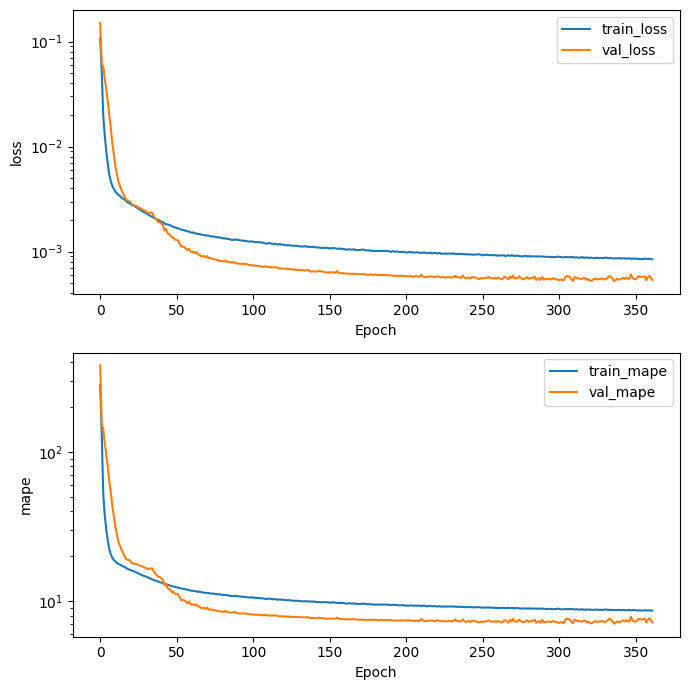

In [ ]:
import matplotlib.pyplot as plt
# Разделение данных
chunk_size = len(train_loss_log) // len(val_loss_log)
chunks_loss = [train_loss_log[i:i+chunk_size] for i in range(0, len(train_loss_log), chunk_size)]
chunks_mape = [train_mape_log[i:i+chunk_size] for i in range(0, len(train_mape_log), chunk_size)]
# Вычисление среднего для каждой части
train_loss_log_mean = [sum(chunk) / len(chunk) for chunk in chunks_loss]
train_mape_log_mean = [sum(chunk) / len(chunk) for chunk in chunks_mape]

plt.figure(figsize=(7, 7))

# График для loss
plt.subplot(2, 1, 1)
plt.plot(train_loss_log_mean)
plt.plot(val_loss_log)
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.yscale('log')

plt.subplot(2, 1, 2)
plt.plot(train_mape_log_mean)
plt.plot(val_mape_log)
plt.legend(['train_mape', 'val_mape'])
plt.xlabel('Epoch')
plt.ylabel('mape')
plt.yscale('log')

plt.tight_layout()
plt.show()

# Таким образом, удалось превзойти качество ML модели